# Popularity Metric Analysis for 2016 Timeframe

In [1]:
import json
import pandas as pd
import numpy as np
import math
import datetime

## Reading the Data

In [2]:
restaurants_df = pd.read_csv("./../datasets/2016_restaurants.csv")

In [3]:
restaurants_df.head()

,business_id,city,state,latitude,longitude,is_open,attributes,categories,hours,checkin_count,review_count,raw_stars,stars,tip_count,first_date,last_date,visit_count,is_open_year_after
0,tCbdrRPZA0oiIYSmHG3J0w,Portland,OR,45.588906,-122.593331,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...",141,13,4.076923,4.0,3,2010-03-09 16:02:04,2021-01-21 17:55:35,157,True
1,D4JtQNTI4X3KcbzacDJsMw,Vancouver,BC,49.251342,-123.101333,1,"{'GoodForKids': 'True', 'Alcohol': ""u'none'"", ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...",22,13,3.615385,3.5,2,2010-09-26 04:03:35,2021-01-23 01:43:50,37,True
2,ufCxltuh56FF4-ZFZ6cVhg,Orlando,FL,28.513265,-81.374707,1,"{'BusinessParking': ""{'garage': False, 'street...","Restaurants, American (New), Bakeries, Dessert...","{'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18...",28,14,4.642857,4.5,3,2012-08-19 21:08:57,2020-12-29 16:25:19,45,True
3,dmbbf3AqeG61_QHRZi1M1w,Pine Castle,FL,28.450303,-81.380587,1,"{'BikeParking': 'False', 'RestaurantsPriceRang...","Automotive, American (Traditional), Gas Statio...",NaN,11,0,NaN,NaN,0,2015-06-11 16:44:12,2020-11-14 00:49:04,11,True
4,jGennaZUr2MsJyRhijNBfA,Boston,MA,42.363442,-71.025781,1,"{'NoiseLevel': ""u'average'"", 'BikeParking': 'F...","Sandwiches, Food, Restaurants, Breakfast & Bru...","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ...",390,105,3.590476,3.5,19,2005-12-13 23:59:04,2020-11-04 20:09:32,514,True


In [4]:
restaurants_df["raw_stars"].isna().sum()

879

In [111]:
restaurants_df = restaurants_df[restaurants_df["review_count"] > 0]

In [11]:
def get_last_date_year(row):
    date = row[15]
    last_date = datetime.datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return last_date.year

def get_first_date_year(row):
    date = row[14]
    first_date = datetime.datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return first_date.year

In [12]:
restaurants_df["last_date_year"] = restaurants_df.apply(get_last_date_year, axis=1)
restaurants_df["first_date_year"] = restaurants_df.apply(get_first_date_year, axis=1)

In [13]:
restaurants_df["checkins_tips_count"] = restaurants_df["tip_count"] + restaurants_df["checkin_count"]

In [14]:
restaurants_df.head(2)

,business_id,city,state,latitude,longitude,is_open,attributes,categories,hours,checkin_count,...,raw_stars,stars,tip_count,first_date,last_date,visit_count,is_open_year_after,last_date_year,checkins_tips_count,first_date_year
0,tCbdrRPZA0oiIYSmHG3J0w,Portland,OR,45.588906,-122.593331,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...",141,...,4.076923,4.0,3,2010-03-09 16:02:04,2021-01-21 17:55:35,157,True,2021,144,2010
1,D4JtQNTI4X3KcbzacDJsMw,Vancouver,BC,49.251342,-123.101333,1,"{'GoodForKids': 'True', 'Alcohol': ""u'none'"", ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...",22,...,3.615385,3.5,2,2010-09-26 04:03:35,2021-01-23 01:43:50,37,True,2021,24,2010


In [16]:
len(restaurants_df[restaurants_df["last_date_year"] < 2017])

653

In [17]:
len(restaurants_df[restaurants_df["first_date_year"] > 2016])

0

In [18]:
restaurants_df = restaurants_df[restaurants_df["last_date_year"] > 2016]

## Analyzing Data

### Looking at Restaurants

In [19]:
len(restaurants_df)

26598

In [20]:
avg_review_count = round(restaurants_df["review_count"].mean())
avg_checkins_count = round(restaurants_df["checkin_count"].mean())
avg_tips_count = round(restaurants_df["tip_count"].mean())
print(f"Restaurants have on {avg_review_count} reviews, {avg_checkins_count} checkins and {avg_tips_count} tips on average")

Restaurants have on 21 reviews, 53 checkins and 3 tips on average


In [21]:
v = len(restaurants_df[restaurants_df["checkin_count"] < 5])
print(f"There are {v} restaurants with 5 checkins or less")

There are 4528 restaurants with 5 checkins or less


In [22]:
average_star_rating = round(restaurants_df["raw_stars"].mean(), 2)
print(f"Restaurants star rating is {average_star_rating}/5 average")

Restaurants star rating is 3.48/5 average


In [23]:
restaurants_df['stars'].value_counts()

4.0    6265
3.5    5305
4.5    3965
3.0    3665
2.5    2110
5.0    1508
2.0    1359
1.0     851
1.5     691
Name: stars, dtype: int64

In [24]:
restaurants_df[['checkin_count', 'tip_count', 'review_count']].corr()

,checkin_count,tip_count,review_count
checkin_count,1.000000,0.73862,0.791619
tip_count,0.738620,1.00000,0.846600
review_count,0.791619,0.84660,1.000000


In [26]:
later_closed = restaurants_df[restaurants_df["is_open"] == 0]

print(f"There were {len(restaurants_df)} restaurants open in 2016 of which {len(later_closed)} have since closed down")

There were 26598 restaurants open in 2016 of which 5047 have since closed down


In [27]:
restaurants_df["visit_count"].mean()

76.27633656665915

In [28]:
restaurants_df["visit_count"].min()

0

In [29]:
restaurants_df["visit_count"].max()

3904

In [30]:
restaurants_df["visit_count"].std()

138.26782620412973

In [31]:
len(restaurants_df[restaurants_df['visit_count'] > 1000])

84

In [32]:
print("25% quantile total is " + str(restaurants_df['visit_count'].quantile(0.25)))
print("33% quantile total is " + str(restaurants_df['visit_count'].quantile(0.33)))
print("50% quantile total is " + str(restaurants_df['visit_count'].quantile(0.5)))
print("66% quantile total is " + str(restaurants_df['visit_count'].quantile(0.66)))
print("75% quantile total is " + str(restaurants_df['visit_count'].quantile(0.75)))

25% quantile total is 14.0
33% quantile total is 19.0
50% quantile total is 36.0
66% quantile total is 61.0
75% quantile total is 86.0


In [33]:
print("25% quantile total is " + str(restaurants_df['checkins_tips_count'].quantile(0.25)))
print("33% quantile total is " + str(restaurants_df['checkins_tips_count'].quantile(0.33)))
print("50% quantile total is " + str(restaurants_df['checkins_tips_count'].quantile(0.5)))
print("66% quantile total is " + str(restaurants_df['checkins_tips_count'].quantile(0.66)))
print("75% quantile total is " + str(restaurants_df['checkins_tips_count'].quantile(0.75)))

25% quantile total is 8.0
33% quantile total is 12.0
50% quantile total is 24.0
66% quantile total is 43.0
75% quantile total is 60.0


#### Correlations

In [34]:
restaurants_df[['visit_count', 'raw_stars']].corr()

,visit_count,raw_stars
visit_count,1.000000,0.174119
raw_stars,0.174119,1.000000


In [35]:
restaurants_df[['visit_count', 'is_open']].corr()

,visit_count,is_open
visit_count,1.000000,0.023345
is_open,0.023345,1.000000


In [36]:
restaurants_df[['checkins_tips_count', 'is_open']].corr()

,checkins_tips_count,is_open
checkins_tips_count,1.000000,0.027266
is_open,0.027266,1.000000


### Looking at the restaurants who later closed down

In [37]:
open_restaurants_in_2017_df = restaurants_df[restaurants_df["is_open"] == 1]

In [38]:
open_restaurants_in_2017_df["visit_count"].mean()

77.83833696812214

In [39]:
closed_restaurants_in_2017_df = restaurants_df[restaurants_df["is_open"] == 0]

In [40]:
len(closed_restaurants_in_2017_df)

5047

In [41]:
closed_restaurants_in_2017_df["visit_count"].mean()

69.60649891024372

In [42]:
closed_restaurants_in_2017_df = closed_restaurants_in_2017_df[closed_restaurants_in_2017_df["last_date_year"] == 2017]

In [43]:
len(closed_restaurants_in_2017_df)

1130

In [44]:
closed_restaurants_in_2017_df["visit_count"].mean()

48.130973451327435

### Looking at % of Restaurants who closed down based on visit count

In [45]:
bottom_df = restaurants_df.loc[restaurants_df["visit_count"] <= 19.0]

In [46]:
len(bottom_df)/len(restaurants_df)

0.33055116926084666

In [47]:
middle_df = restaurants_df.loc[restaurants_df["visit_count"] > 19.0]
middle_df = middle_df.loc[middle_df["visit_count"] <= 61.0]

In [48]:
len(middle_df)/len(restaurants_df)

0.33171667042634784

In [49]:
top_df = restaurants_df.loc[restaurants_df["visit_count"] > 61.0]

In [50]:
len(top_df)/len(restaurants_df)

0.33773216031280545

In [51]:
(len(bottom_df) + len(middle_df) + len(top_df))/len(restaurants_df)

1.0

In [52]:
total_closed = len(closed_restaurants_in_2017_df)
print(total_closed)

1130


In [53]:
bottom_closed_df = bottom_df[(bottom_df["is_open"] == 0) & (bottom_df["last_date_year"] == 2017)]
middle_closed_df = middle_df[(middle_df["is_open"] == 0) & (middle_df["last_date_year"] == 2017)]
top_closed_df = top_df[(top_df["is_open"] == 0) & (top_df["last_date_year"] == 2017)]

In [54]:
bottom_pct = round(len(bottom_closed_df) / total_closed * 100, 2)
middle_pct = round(len(middle_closed_df) / total_closed * 100, 2)
top_pct = round(len(top_closed_df) / total_closed * 100, 2)

print(f"{bottom_pct}% of closed restaurants are in the bottom 33% quartile")
print(f"{middle_pct}% of closed restaurants are in the middle 33% quartile")
print(f"{top_pct}% of closed restaurants are in the top 33% quartile")

35.31% of closed restaurants are in the bottom 33% quartile
38.85% of closed restaurants are in the middle 33% quartile
25.84% of closed restaurants are in the top 33% quartile


In [55]:
first_df = restaurants_df.loc[restaurants_df["visit_count"] <= 36]
second_df = restaurants_df.loc[restaurants_df["visit_count"] > 36]

In [56]:
first_closed_df = first_df[(first_df["is_open"] == 0) & (first_df["last_date_year"] == 2017)]
second_closed_df = second_df[(second_df["is_open"] == 0) & (second_df["last_date_year"] == 2017)]

In [57]:
print(f"{round(len(first_closed_df) / total_closed * 100, 2)}% of closed restaurants are in the bottom 50% quartile")
print(f"{round(len(second_closed_df) / total_closed * 100, 2)}% of closed restaurants are in the top 50% quartile")

56.11% of closed restaurants are in the bottom 50% quartile
43.89% of closed restaurants are in the top 50% quartile


In [58]:
bm = bottom_df["raw_stars"].mean()
mm = middle_df["raw_stars"].mean()
tm = top_df["raw_stars"].mean()
print(bm, mm, tm)

3.204649895015819 3.454684938621264 3.7543916392419088


### Looking at % of Restaurants who closed down based on tips and checkins count

In [59]:
bottom_df = restaurants_df.loc[restaurants_df["checkins_tips_count"] <= 12.0]
middle_df = restaurants_df.loc[restaurants_df["checkins_tips_count"] > 12.0]
middle_df = middle_df.loc[middle_df["checkins_tips_count"] <= 43]
top_df = restaurants_df.loc[restaurants_df["checkins_tips_count"] > 43]

In [60]:
(len(bottom_df) + len(middle_df) + len(top_df))/len(restaurants_df)

1.0

In [61]:
bottom_closed_df = bottom_df[(bottom_df["is_open"] == 0) & (bottom_df["last_date_year"] == 2017)]
middle_closed_df = middle_df[(middle_df["is_open"] == 0) & (middle_df["last_date_year"] == 2017)]
top_closed_df = top_df[(top_df["is_open"] == 0) & (top_df["last_date_year"] == 2017)]

In [62]:
bottom_pct = round(len(bottom_closed_df) / total_closed * 100, 2)
middle_pct = round(len(middle_closed_df) / total_closed * 100, 2)
top_pct = round(len(top_closed_df) / total_closed * 100, 2)

print(f"{bottom_pct}% of closed restaurants are in the bottom 33% quartile")
print(f"{middle_pct}% of closed restaurants are in the middle 33% quartile")
print(f"{top_pct}% of closed restaurants are in the top 33% quartile")

39.29% of closed restaurants are in the bottom 33% quartile
37.26% of closed restaurants are in the middle 33% quartile
23.45% of closed restaurants are in the top 33% quartile


In [63]:
first_df = restaurants_df.loc[restaurants_df["checkins_tips_count"] <= 24]
second_df = restaurants_df.loc[restaurants_df["checkins_tips_count"] > 24]

first_closed_df = first_df[(first_df["is_open"] == 0) & (first_df["last_date_year"] == 2017)]
second_closed_df = second_df[(second_df["is_open"] == 0) & (second_df["last_date_year"] == 2017)]

In [64]:
print(f"{round(len(first_closed_df) / total_closed * 100, 2)}% of closed restaurants are in the bottom 50% quartile")
print(f"{round(len(second_closed_df) / total_closed * 100, 2)}% of closed restaurants are in the top 50% quartile")

58.67% of closed restaurants are in the bottom 50% quartile
41.33% of closed restaurants are in the top 50% quartile


### Looking at % of Restaurants who closed down based star rating

In [65]:
print("25% quantile total is " + str(restaurants_df['raw_stars'].quantile(0.25)))
print("33% quantile total is " + str(restaurants_df['raw_stars'].quantile(0.33)))
print("50% quantile total is " + str(restaurants_df['raw_stars'].quantile(0.5)))
print("66% quantile total is " + str(restaurants_df['raw_stars'].quantile(0.66)))
print("75% quantile total is " + str(restaurants_df['raw_stars'].quantile(0.75)))

25% quantile total is 3.0
33% quantile total is 3.2142857142857144
50% quantile total is 3.6538461538461537
66% quantile total is 4.0
75% quantile total is 4.153846153846153


In [66]:
bottom_df = restaurants_df.loc[restaurants_df["raw_stars"] <= 3.21]
middle_df = restaurants_df.loc[restaurants_df["raw_stars"] > 3.21]
middle_df = middle_df.loc[middle_df["raw_stars"] <= 4.0]
top_df = restaurants_df.loc[restaurants_df["raw_stars"] > 4.0]

In [67]:
bottom_closed_df = bottom_df[(bottom_df["is_open"] == 0) & (bottom_df["last_date_year"] == 2017)]
middle_closed_df = middle_df[(middle_df["is_open"] == 0) & (middle_df["last_date_year"] == 2017)]
top_closed_df = top_df[(top_df["is_open"] == 0) & (top_df["last_date_year"] == 2017)]

In [68]:
bottom_pct = round(len(bottom_closed_df) / total_closed, 2)*100
middle_pct = round(len(middle_closed_df) / total_closed, 2)*100
top_pct = round(len(top_closed_df) / total_closed *100, 2)

print(f"{bottom_pct}% of closed restaurants are in the bottom 33% quartile")
print(f"{middle_pct}% of closed restaurants are in the middle 33% quartile")
print(f"{top_pct}% of closed restaurants are in the top 33% quartile")

38.0% of closed restaurants are in the bottom 33% quartile
37.0% of closed restaurants are in the middle 33% quartile
23.1% of closed restaurants are in the top 33% quartile


In [70]:
first_df = restaurants_df.loc[restaurants_df["raw_stars"] <= 3.65]
second_df = restaurants_df.loc[restaurants_df["raw_stars"] > 3.65]

first_closed_df = first_df[(first_df["is_open"] == 0) & (first_df["last_date_year"] == 2017)]
second_closed_df = second_df[(second_df["is_open"] == 0) & (second_df["last_date_year"] == 2017)]

In [72]:
print(f"{round(len(first_closed_df) / total_closed * 100, 2)}% of closed restaurants are in the bottom 50% quartile")
print(f"{round(len(second_closed_df) / total_closed * 100, 2)}% of closed restaurants are in the top 50% quartile")

55.84% of closed restaurants are in the bottom 50% quartile
42.3% of closed restaurants are in the top 50% quartile


### Looking at star rating of unpopular businesses

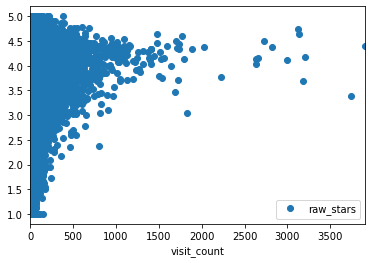

In [74]:
restaurants_df.plot(x='visit_count', y='raw_stars', style='o')

### K-Means Clustering

In [75]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [136]:
X_df = restaurants_df.copy()[["checkins_tips_count", "raw_stars"]]
X_df["raw_stars"] = X_df["raw_stars"].apply(lambda x: x*50)
X_df = X_df.dropna()

In [137]:
X = X_df.to_numpy()

In [138]:
X

array([[144.        , 203.84615385],
       [ 24.        , 180.76923077],
       [ 31.        , 232.14285714],
       ...,
       [116.        , 138.33333333],
       [ 41.        , 148.21428571],
       [ 33.        , 206.57894737]])

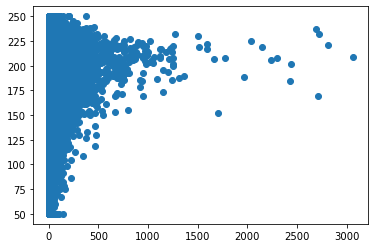

In [139]:
plt.scatter(X[:,0], X[:,1])

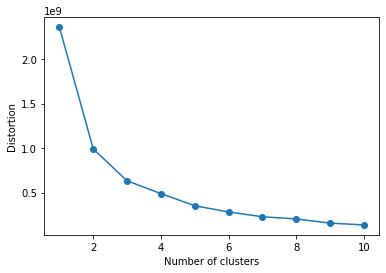

In [92]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [174]:
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=30, max_iter=1000, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

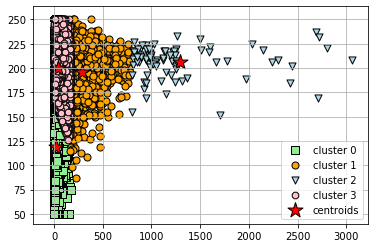

In [175]:
# plot the 4 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 0'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 3, 0], X[y_km == 3, 1],
    s=50, c='pink',
    marker='8', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [176]:
y_km

array([3, 3, 3, ..., 3, 0, 3])

In [177]:
len(y_km)

25719

In [178]:
unique, counts = np.unique(list(y_km), return_counts=True)
dict(zip(unique, counts))

{0: 8056, 1: 1819, 2: 79, 3: 15765}

In [179]:
def get_label(nb):
    if nb == 0:
        return 0
    if nb == 1:
        return 2
    if nb == 2:
        return 2
    if nb == 3:
        return 1


labels = [get_label(nb) for nb in list(y_km)]

In [180]:
restaurants_df['k'] = labels

C:\Users\oktar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [181]:
restaurants_df.head()

,business_id,city,state,latitude,longitude,is_open,attributes,categories,hours,checkin_count,...,stars,tip_count,first_date,last_date,visit_count,is_open_year_after,last_date_year,checkins_tips_count,first_date_year,k
0,tCbdrRPZA0oiIYSmHG3J0w,Portland,OR,45.588906,-122.593331,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...",141,...,4.0,3,2010-03-09 16:02:04,2021-01-21 17:55:35,157,True,2021,144,2010,1
1,D4JtQNTI4X3KcbzacDJsMw,Vancouver,BC,49.251342,-123.101333,1,"{'GoodForKids': 'True', 'Alcohol': ""u'none'"", ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...",22,...,3.5,2,2010-09-26 04:03:35,2021-01-23 01:43:50,37,True,2021,24,2010,1
2,ufCxltuh56FF4-ZFZ6cVhg,Orlando,FL,28.513265,-81.374707,1,"{'BusinessParking': ""{'garage': False, 'street...","Restaurants, American (New), Bakeries, Dessert...","{'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18...",28,...,4.5,3,2012-08-19 21:08:57,2020-12-29 16:25:19,45,True,2020,31,2012,1
4,jGennaZUr2MsJyRhijNBfA,Boston,MA,42.363442,-71.025781,1,"{'NoiseLevel': ""u'average'"", 'BikeParking': 'F...","Sandwiches, Food, Restaurants, Breakfast & Bru...","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ...",390,...,3.5,19,2005-12-13 23:59:04,2020-11-04 20:09:32,514,True,2020,409,2005,2
6,jx91IMdGOmLOo8h_F9z39g,Portland,OR,45.526473,-122.535323,1,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Nightlife, Sandwiches, Seafood, Restaurants","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",3,...,4.5,0,2007-12-06 17:06:49,2020-02-22 23:57:30,7,True,2020,3,2007,1


In [182]:
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

{0: 8056, 1: 15765, 2: 1898}

In [183]:
restaurants_df[["visit_count", "k"]].corr()

,visit_count,k
visit_count,1.000000,0.514402
k,0.514402,1.000000


### Trying to validate the cluster classification

In [184]:
bottom_df = restaurants_df.loc[restaurants_df["k"] == 0]
middle_df = restaurants_df.loc[restaurants_df["k"] == 1]
top_df = restaurants_df.loc[restaurants_df["k"] == 2]
#best_df = restaurants_df.loc[restaurants_df["k"] == 3]

In [185]:
bottom_closed_df = bottom_df[(bottom_df["is_open"] == 0) & (bottom_df["last_date_year"] == 2017)]
middle_closed_df = middle_df[(middle_df["is_open"] == 0) & (middle_df["last_date_year"] == 2017)]
top_closed_df = top_df[(top_df["is_open"] == 0) & (top_df["last_date_year"] == 2017)]
#best_closed_df = best_df[(best_df["is_open"] == 0) & (best_df["last_date_year"] == 2017)]

In [186]:
bottom_pct = round(len(bottom_closed_df) / len(bottom_df), 2)
middle_pct = round(len(middle_closed_df) / len(middle_df), 2)
top_pct = round(len(top_closed_df) / len(top_df), 2)
#best_pct = round(len(top_closed_df) / len(top_df), 2)

print(f"{bottom_pct}% of unpopular restaurants closed in 2017")
print(f"{middle_pct}% of neutral restaurants closed in 2017")
print(f"{top_pct}% of popular restaurants closed in 2017")
#print(f"{best_pct}% of very popular restaurants closed in 2017")

0.05% of unpopular restaurants closed in 2017
0.04% of neutral restaurants closed in 2017
0.01% of popular restaurants closed in 2017
